# Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt 
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree

# Taking DataSet into DataFrame 

In [2]:
df_titanic = pd.read_csv('C:/Users/athar/Downloads/train.csv')

# Variable Identification

In [3]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Icard, Miss. Amelie",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_titanic.shape

(891, 12)

In [9]:
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df_titanic['Pclass'].unique().tolist()

[3, 1, 2]

In [11]:
df_titanic['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

# Univariate Analysis

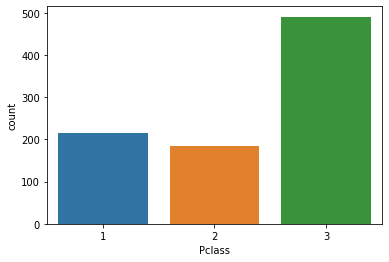

In [12]:
sns.countplot(df_titanic['Pclass'])

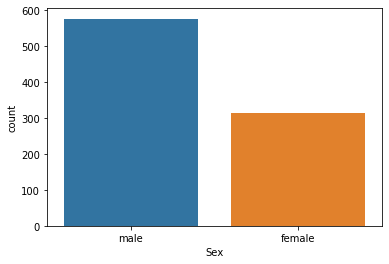

In [13]:
sns.countplot(df_titanic['Sex'])

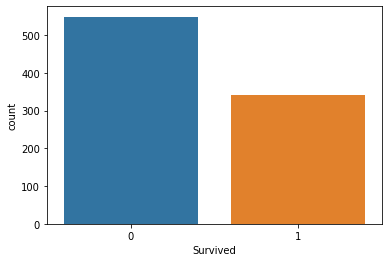

In [14]:
sns.countplot(df_titanic['Survived'])

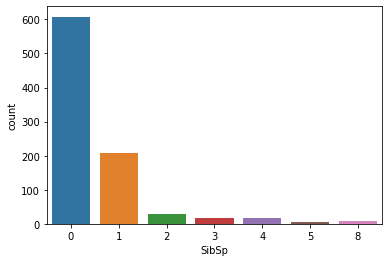

In [15]:
sns.countplot(df_titanic['SibSp'])

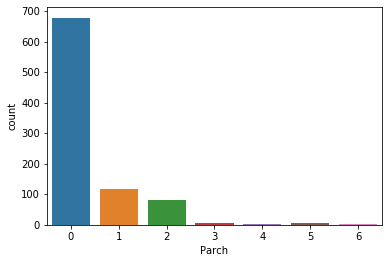

In [16]:
sns.countplot(df_titanic['Parch'])

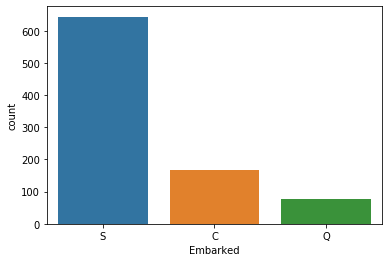

In [17]:
sns.countplot(df_titanic['Embarked'])

# Bivariate Analysis

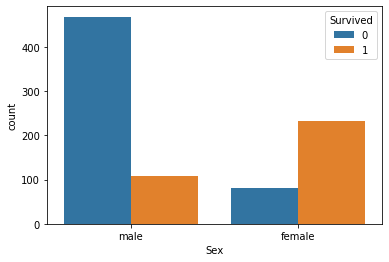

In [18]:
sns.countplot('Sex', hue='Survived', data=df_titanic)

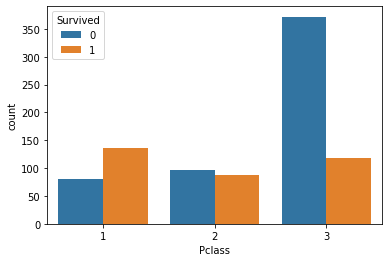

In [19]:
sns.countplot('Pclass', hue='Survived', data=df_titanic)

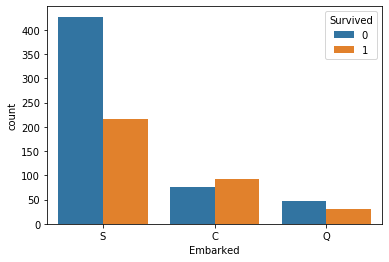

In [20]:
sns.countplot('Embarked', hue='Survived', data=df_titanic)

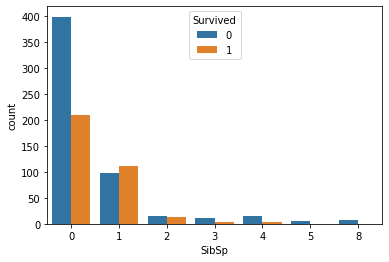

In [21]:
sns.countplot('SibSp', hue='Survived', data=df_titanic)

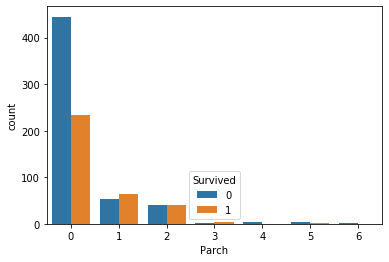

In [22]:
sns.countplot('Parch', hue='Survived', data=df_titanic)

# Correlation between variables

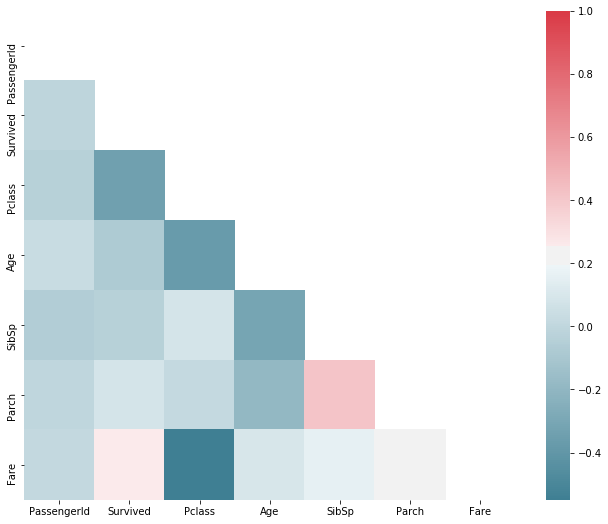

In [23]:
corr = df_titanic.corr()


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)


# Outlier Treatment

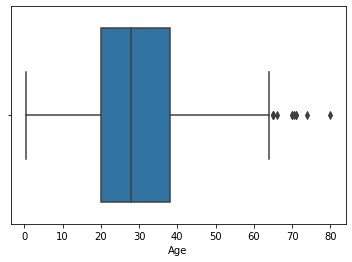

In [24]:
sns.boxplot(df_titanic['Age'])

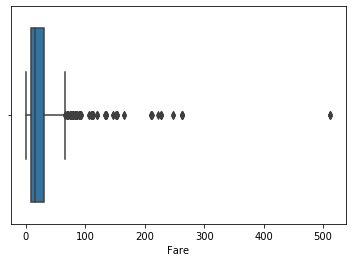

In [25]:
sns.boxplot(df_titanic['Fare'])

# Missing Value Treatment

In [26]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df_titanic['Age'].fillna(np.mean(df_titanic['Age']),inplace=True)

In [28]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df_titanic['Embarked'].fillna(statistics.mode(df_titanic['Embarked']),inplace=True)

In [30]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Variable Transformation

In [31]:
Titanic_num = df_titanic[['SibSp','Parch', 'Age', 'Fare','Pclass']]
Titanic_categ=df_titanic[['Sex', 'Embarked']]

# Variable Creation

In [32]:
Titanic_dummies = pd.get_dummies(Titanic_categ)
Titanic_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


# Combining Numerical and Dummy Variables

In [33]:
Titanic_combined = pd.concat([Titanic_num, Titanic_dummies], axis=1)
Titanic_combined.head()

,SibSp,Parch,Age,Fare,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,7.2500,3,0,1,0,0,1
1,1,0,38.0,71.2833,1,1,0,1,0,0
2,0,0,26.0,7.9250,3,1,0,0,0,1
3,1,0,35.0,53.1000,1,1,0,0,0,1
4,0,0,35.0,8.0500,3,0,1,0,0,1


# Splitting Data into Training Data and Testing Data

In [34]:
df_titanic_target = ['Survived']
train_df_titanic = Titanic_combined
X_train, X_test, y_train, y_test = train_test_split(train_df_titanic, df_titanic[df_titanic_target], train_size=0.7, random_state = 100)

# Applying various prediction methods

## 1) Logistic Regression

### a) Applying Algorithm

In [35]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

C:\Users\athar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\athar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### b) Evaluating Metrics 

In [36]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)

Accuracy is  : 0.7910447761194029
F1 score is : 0.7227722772277227
Precision is  : 0.7849462365591398
Recall is  : 0.6697247706422018
Roc Auc is  : 0.7719693035600946


## 2) Random Forest

### a) Applying Algorithm 

In [37]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\Users\athar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### b) Evaluating Metrics 

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8246268656716418
Precision: 0.7980769230769231
Recall: 0.7614678899082569


### c) Hyper Parameter Tuning

In [93]:
rf = RandomForestClassifier(n_estimators=15,min_samples_split=10,max_features=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

C:\Users\athar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


### d) Evaluating after Tuning

In [94]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8283582089552238
Precision: 0.8620689655172413
Recall: 0.6880733944954128


## 3) Decision Tree

### a) Applying Algorithm 

In [39]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

### b) Evaluating Metrics 

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.753731343283582
Precision: 0.6902654867256637
Recall: 0.7155963302752294


### c) Hyper Parameter Tuning

In [131]:
dt = tree.DecisionTreeClassifier(min_impurity_decrease=0,random_state=100,max_features=10,min_samples_leaf=6,min_samples_split=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

### d) Evaluating Metrics after Tuning

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8097014925373134
Precision: 0.7843137254901961
Recall: 0.7339449541284404
